In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_dir = Path("../data/raw")
df = pd.read_csv(data_dir / "train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
targ = "SalePrice"

<Axes: xlabel='SalePrice', ylabel='Count'>

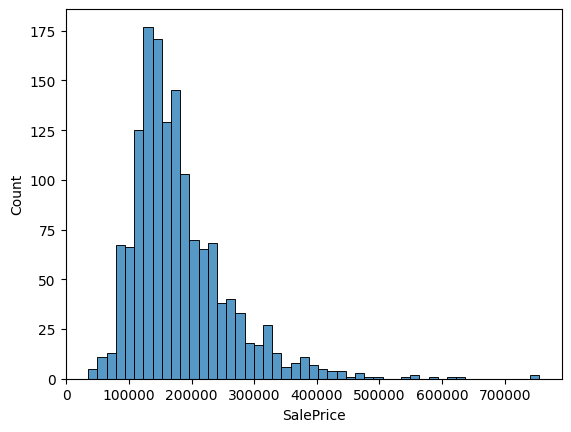

In [5]:
sns.histplot(df, x=targ)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## MSSubClass

Identifies the type of dwelling involved in the sale.	

A lot of categories, strong effect on price.
Some categories are rare.

Use OHE with `min_frequency`.


In [7]:
df["MSSubClass"].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [8]:
df["MSSubClass"].isna().sum()

0

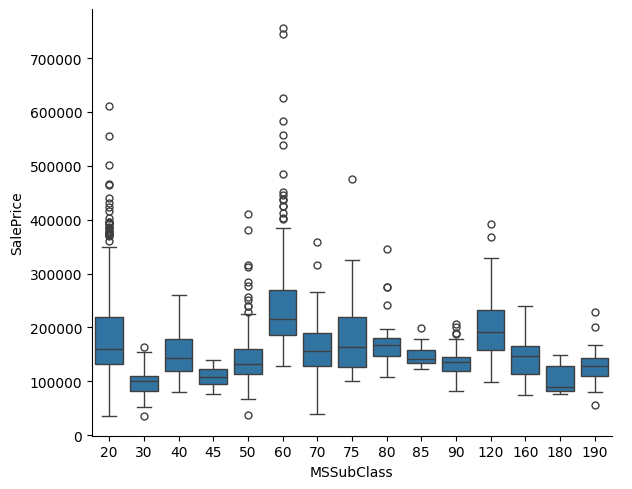

In [9]:
sns.catplot(df, x="MSSubClass", y=targ, kind="box", aspect=1.25)

## MSZoning

Identifies the general zoning classification of the sale.

5 categories, 3 are very rare.

Use OHE with `min_frequency`.

In [10]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [11]:
df["MSZoning"].isna().sum()

0

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

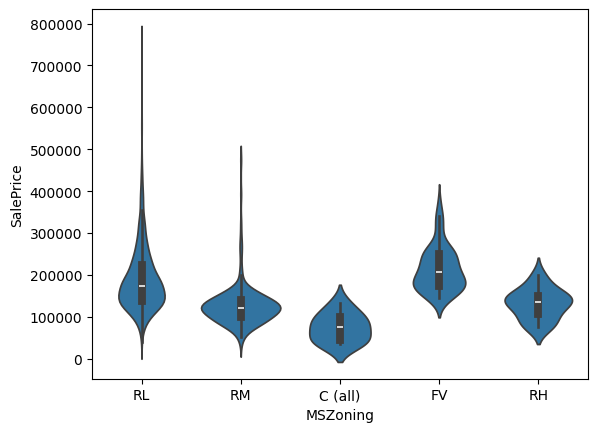

In [12]:
sns.violinplot(df, x="MSZoning", y=targ)

## LotFrontage 

Linear feet of street connected to property

Some `nan`s and outliers, normal-ish distribution.

Impute with median and scale.

In [13]:
df["LotFrontage"].dtype

dtype('float64')

In [14]:
df["LotFrontage"].isna().sum()

259

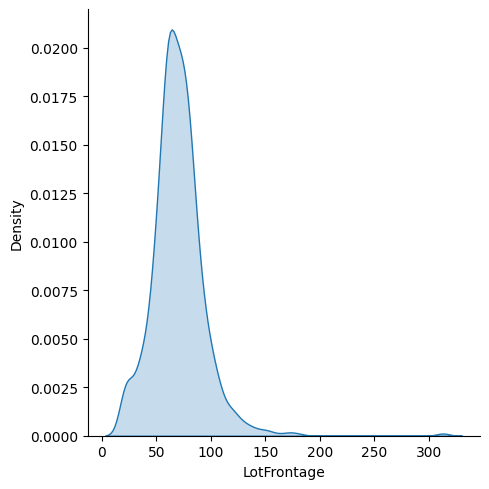

In [15]:
sns.displot(df, x="LotFrontage", kind="kde", fill=True)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

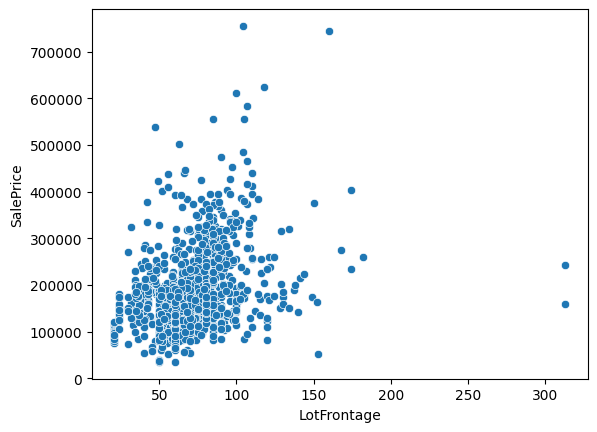

In [16]:
sns.scatterplot(df, x="LotFrontage", y=targ)

## LotArea

Lot size in square feet

Use robust scaler.

In [17]:
df["LotArea"].dtype, df["LotArea"].isna().sum()

(dtype('int64'), 0)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

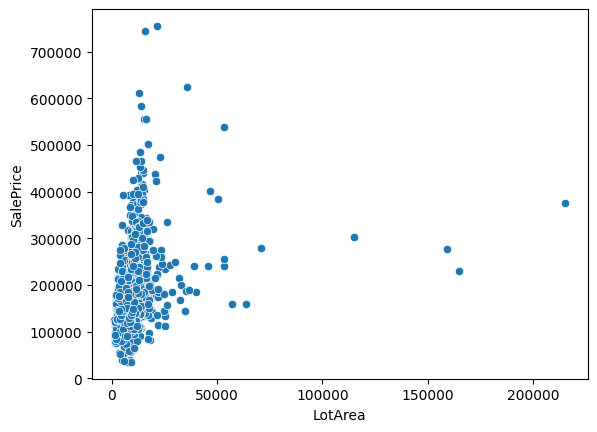

In [18]:
sns.scatterplot(df, x="LotArea", y=targ)

(0.0, 25000.0)

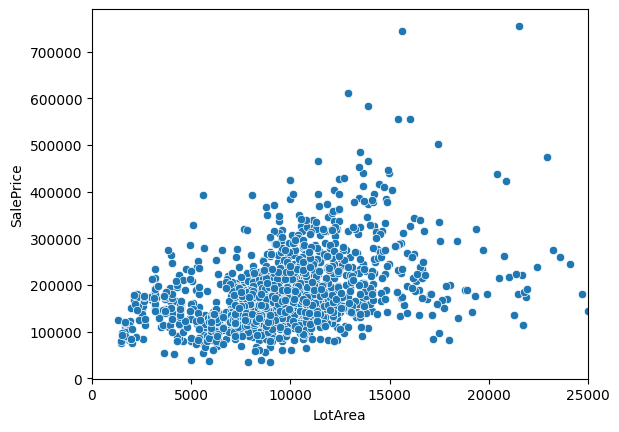

In [19]:
sns.scatterplot(df, x="LotArea", y=targ)
plt.xlim(0, 25000)

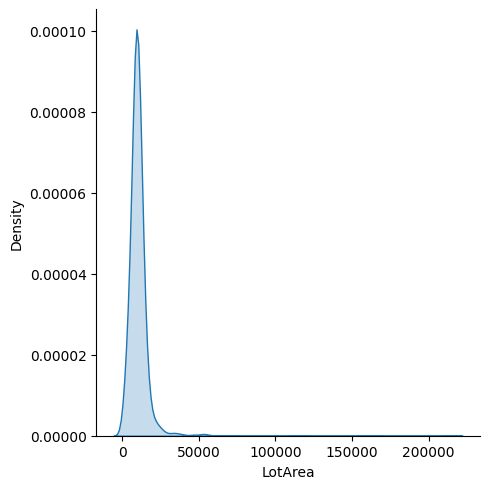

In [20]:
sns.displot(df, x="LotArea", kind="kde", fill=True)

## Street

Type of road access to property

6 non-default values.

Drop.

In [21]:
df["Street"].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [22]:
mask = df["Street"] == "Grvl"
df.loc[mask, [targ, "LotArea"]]

SalePrice  LotArea
52       110000     8472
335      228950   164660
582      118500    11841
812       55993     8712
1061      81000    18000
1184     186700    35133

## Alley

Type of alley access

`Grvl` is rare, but has strong bias. Use it as a feature.

In [23]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='SalePrice'>

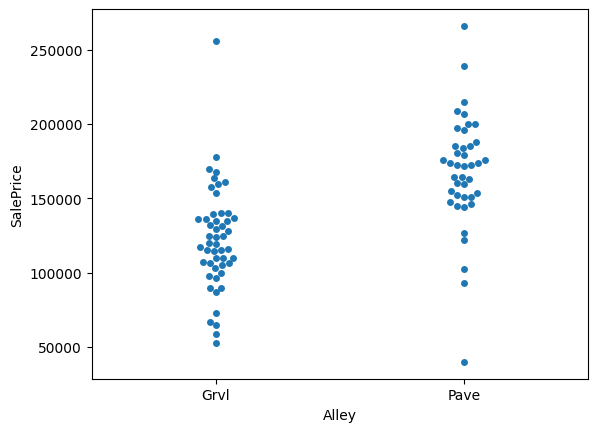

In [24]:
sns.swarmplot(df, x="Alley", y=targ)

<Axes: xlabel='Alley', ylabel='SalePrice'>

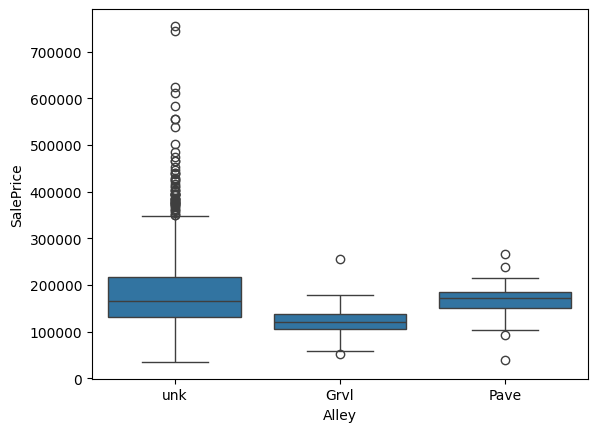

In [25]:
tmp = pd.DataFrame(data={"Alley": df["Alley"], targ: df[targ]})
mask = tmp["Alley"].isna()
tmp.loc[mask, "Alley"] = "unk"
sns.boxplot(tmp, x="Alley", y=targ)

## LotShape

General shape of property

All `IR`s look somewhat similar, group them as a boolean feature.

In [26]:
df["LotShape"].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [27]:
df["LotShape"].isna().any()

False

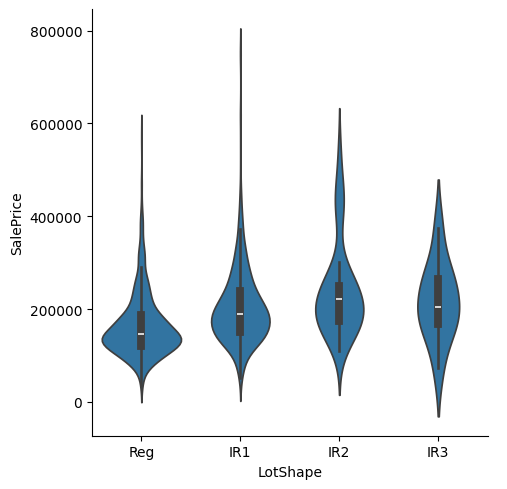

In [28]:
sns.catplot(df, x="LotShape", y=targ, kind="violin")

## LandSlope

Slope of property

Non-defaults are rare and don't seem to affect price all that much.

Drop.

In [29]:
df["LandSlope"].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [30]:
df["LandSlope"].isna().any()

False

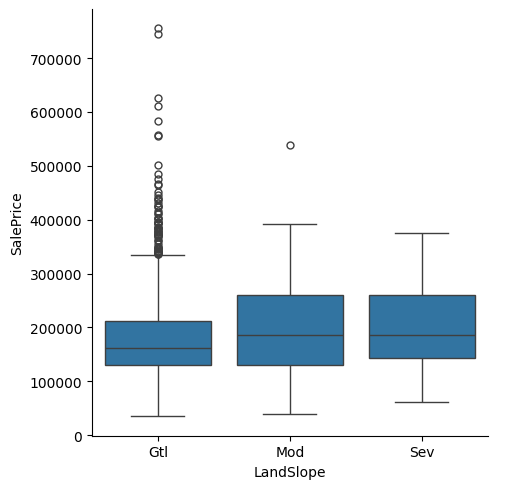

In [31]:
sns.catplot(df, x="LandSlope", y=targ, kind="box")

## Neighborhood

Physical locations within Ames city limits

Many categories, some are very rare.

Use OHE of manually selected values.

In [32]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [33]:
df["Neighborhood"].isna().any()

False

In [34]:
neigh_counts = df["Neighborhood"].value_counts()
tmp = pd.DataFrame(data=neigh_counts)
means, stds = [], []
global_mean = df[targ].mean()
for neigh in neigh_counts.index:
    mask = df["Neighborhood"] == neigh
    means.append(df.loc[mask, targ].mean() / global_mean)
    stds.append(df.loc[mask, targ].std() / global_mean)
tmp["mean"] = means
tmp["std"] = stds
tmp

count      mean       std
Neighborhood                           
NAmes           225  0.806136  0.182816
CollgCr         150  1.094210  0.284122
OldTown         113  0.708736  0.291014
Edwards         100  0.708705  0.238826
Somerst          86  1.245735  0.310508
Gilbert          79  1.065959  0.198909
NridgHt          77  1.748113  0.532787
Sawyer           74  0.756092  0.123508
NWAmes           73  1.044930  0.205461
SawyerW          59  1.031144  0.307604
BrkSide          58  0.689991  0.223018
Crawfor          51  1.164179  0.380643
Mitchel          49  0.863747  0.201671
NoRidge          41  1.853267  0.671080
Timber           38  1.338967  0.358419
IDOTRR           37  0.553411  0.184482
ClearCr          28  1.174906  0.277643
StoneBr          25  1.716211  0.624414
SWISU            25  0.788141  0.180316
MeadowV          17  0.544859  0.129841
Blmngtn          17  1.077104  0.167992
BrDale           16  0.577565  0.079207
Veenker          11  1.319761  0.400005
NPkVill           9  0.788710  0.051831
Blueste           2  0.759999  0.105526

In [35]:
mask = (tmp["mean"] - tmp["std"] > 1) | (tmp["mean"] + tmp["std"] < 1)
tmp[mask]

count      mean       std
Neighborhood                           
NAmes           225  0.806136  0.182816
OldTown         113  0.708736  0.291014
Edwards         100  0.708705  0.238826
NridgHt          77  1.748113  0.532787
Sawyer           74  0.756092  0.123508
BrkSide          58  0.689991  0.223018
NoRidge          41  1.853267  0.671080
IDOTRR           37  0.553411  0.184482
StoneBr          25  1.716211  0.624414
SWISU            25  0.788141  0.180316
MeadowV          17  0.544859  0.129841
BrDale           16  0.577565  0.079207
NPkVill           9  0.788710  0.051831
Blueste           2  0.759999  0.105526

## Condition1

Proximity to main road or railroad

Non-default values are rare.

Drop.

In [36]:
df["Condition1"].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

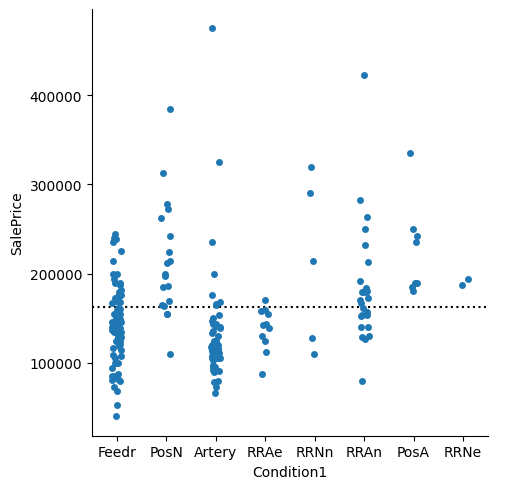

In [37]:
mask = df["Condition1"] != "Norm"
tmp = df.loc[mask, ["Condition1", targ]]
g = sns.catplot(tmp, x="Condition1", y=targ, kind="strip")
g.ax.axhline(df[targ].median(), color="k", ls=":")

## Condition2

Proximity to main road or railroad (if a second is present)

Also drop.

In [38]:
df["Condition2"].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

<Axes: xlabel='Cond2', ylabel='SalePrice'>

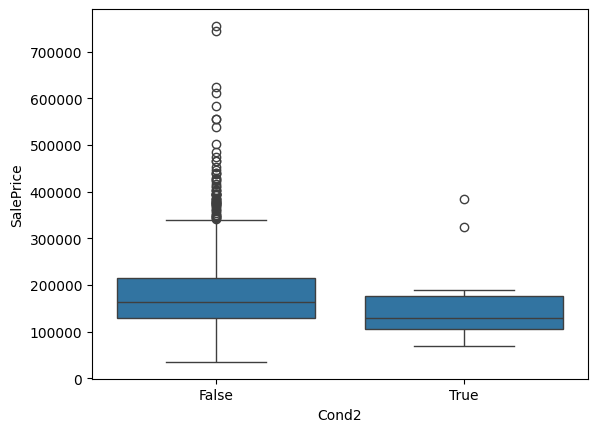

In [39]:
mask = (df["Condition2"] != "Norm")
tmp = pd.DataFrame(df[targ])
tmp["Cond2"] = mask
sns.boxplot(tmp, x="Cond2", y=targ)

## BldgType

Type of dwelling

Group `2fmCon`, `Duplex` and `TwnhsE` as a boolean feature.

In [40]:
df["BldgType"].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [41]:
df["BldgType"].isna().any()

False

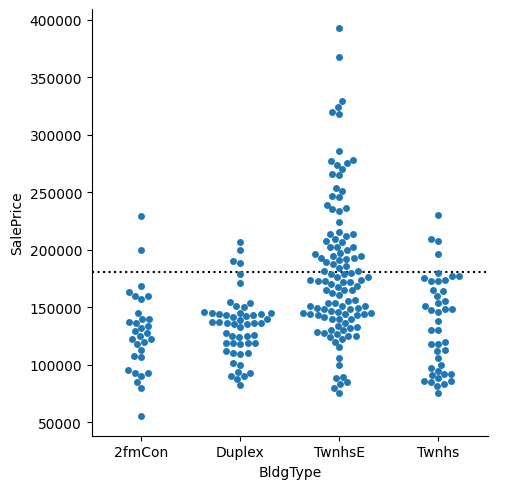

In [42]:
mask = df["BldgType"] != "1Fam"
tmp = df.loc[mask, ["BldgType", targ]]
plt.close("all")
g = sns.catplot(tmp, x="BldgType", y=targ, kind="swarm")
g.ax.axhline(df[targ].mean(), color="k", ls=":")

## HouseStyle

Style of dwelling

OHE with `min_frequency` because I'm lazy.

In [43]:
df["HouseStyle"].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [44]:
df["HouseStyle"].isna().any()

False

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

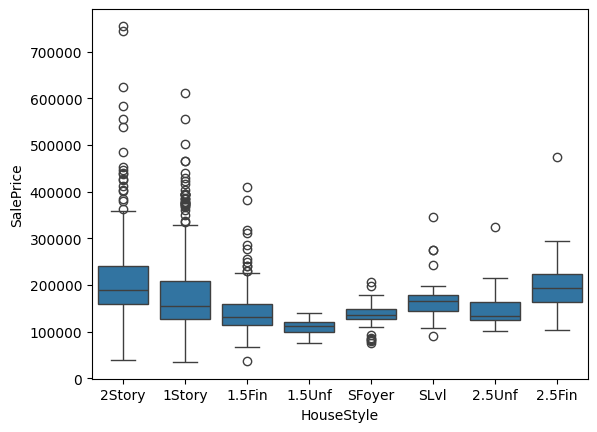

In [45]:
sns.boxplot(df, x="HouseStyle", y=targ)

## OverallQual

Overall material and finish quality

Custom scaling

In [46]:
df["OverallQual"].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [47]:
df["OverallQual"].isna().any()

False

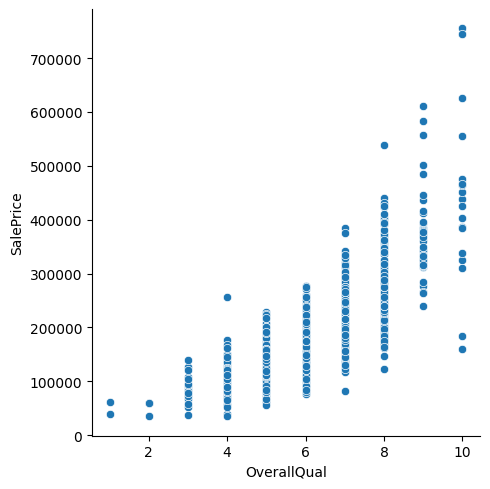

In [48]:
sns.relplot(df, x="OverallQual", y=targ, kind="scatter")

<Axes: xlabel='OverallQual', ylabel='Count'>

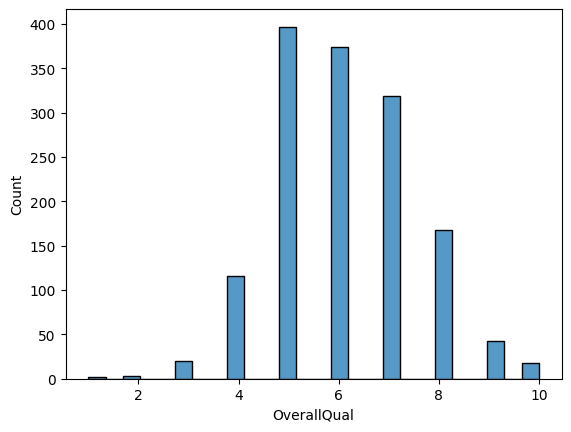

In [49]:
sns.histplot(df, x="OverallQual")

## OverallCond

Overall condition rating

Custom scaling

In [50]:
df["OverallCond"].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [51]:
df["OverallCond"].isna().any()

False

<Axes: xlabel='OverallCond', ylabel='Count'>

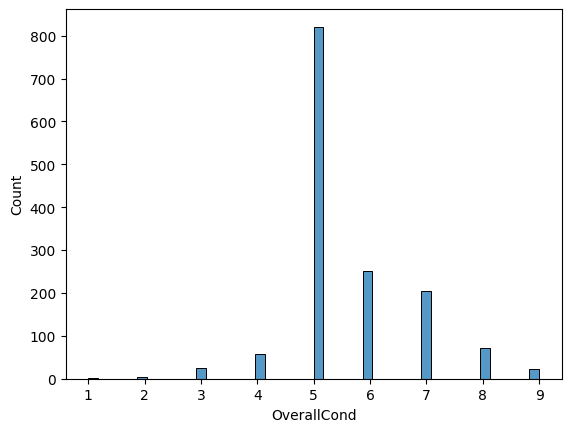

In [52]:
sns.histplot(df, x="OverallCond")

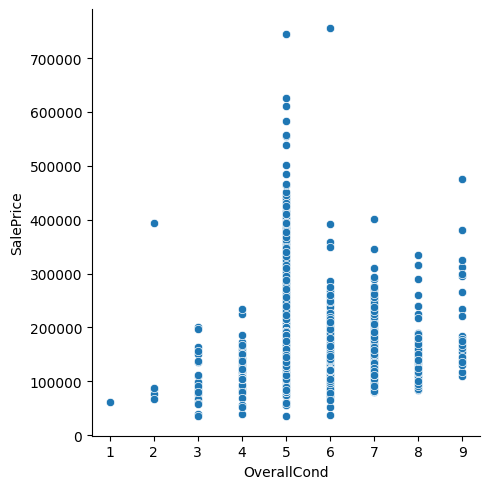

In [53]:
sns.relplot(df, x="OverallCond", y=targ)

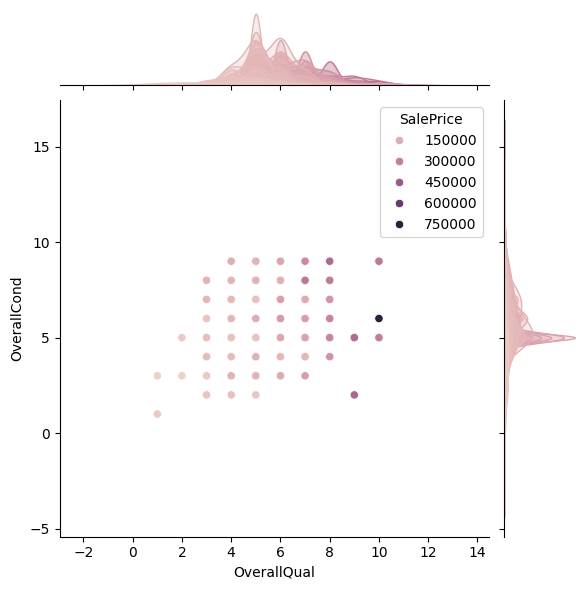

In [54]:
sns.jointplot(df, x="OverallQual", y="OverallCond", hue=targ)

## YearBuilt

Original construction date

Use to create `Age` feature

In [55]:
df["YearBuilt"].dtype

dtype('int64')

In [56]:
df["YearBuilt"].isna().any()

False

In [57]:
df["YearBuilt"].max()

2010

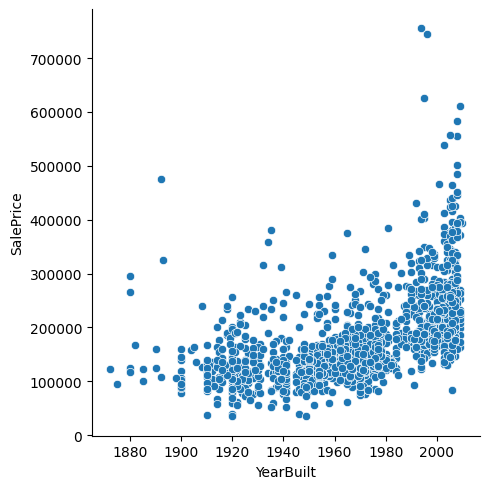

In [58]:
sns.relplot(df, x="YearBuilt", y=targ)

## YearRemodAdd

Remodel date

Use with `YearBuilt` for boolean `Remodelled` features

In [59]:
df["YearRemodAdd"].isna().any()

False

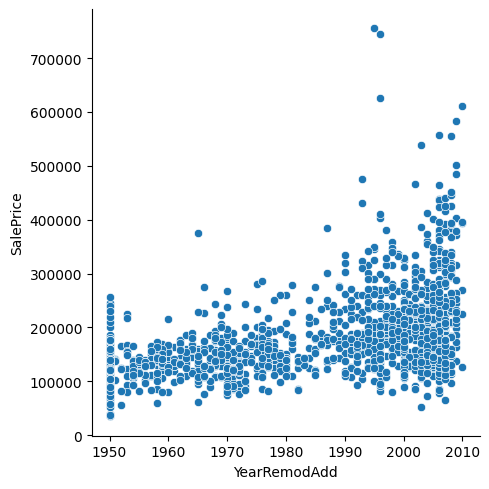

In [60]:
sns.relplot(df, x="YearRemodAdd", y=targ)

<Axes: ylabel='Count'>

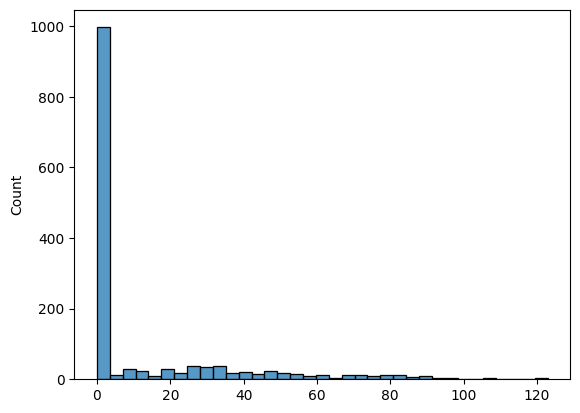

In [61]:
sns.histplot(df["YearRemodAdd"] - df["YearBuilt"])

215


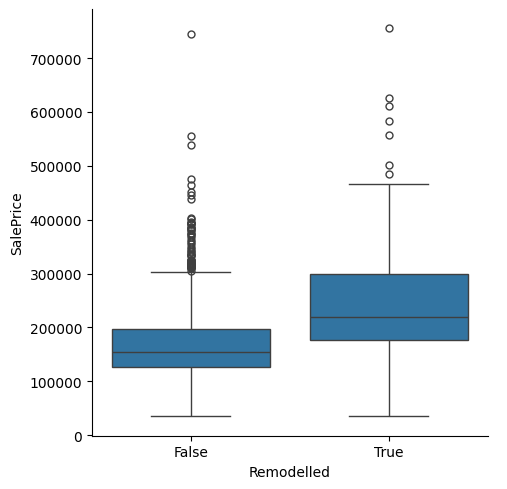

In [62]:
tmp = pd.DataFrame(data=df[targ])
tmp["Remodelled"] = (df["YearRemodAdd"] - df["YearBuilt"]) == 1
print(tmp["Remodelled"].sum())
sns.catplot(tmp, x="Remodelled", y=targ, kind="box")

481


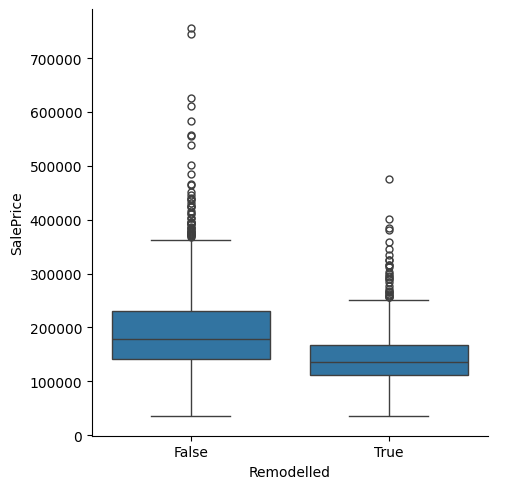

In [63]:
tmp = pd.DataFrame(data=df[targ])
tmp["Remodelled"] = (df["YearRemodAdd"] - df["YearBuilt"]) > 1
print(tmp["Remodelled"].sum())
sns.catplot(tmp, x="Remodelled", y=targ, kind="box")

## RoofStyle

Type of roof

Does not look all that usefull on its own, drop for now

In [64]:
df["RoofStyle"].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

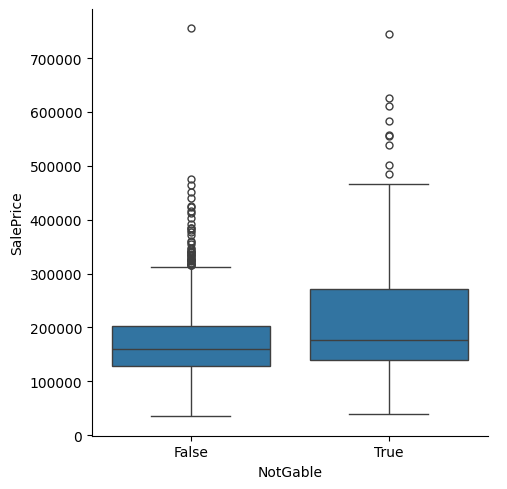

In [65]:
tmp = pd.DataFrame(data=df[targ])
tmp["NotGable"] = df["RoofStyle"] != "Gable"
sns.catplot(tmp, x="NotGable", y=targ, kind="box")

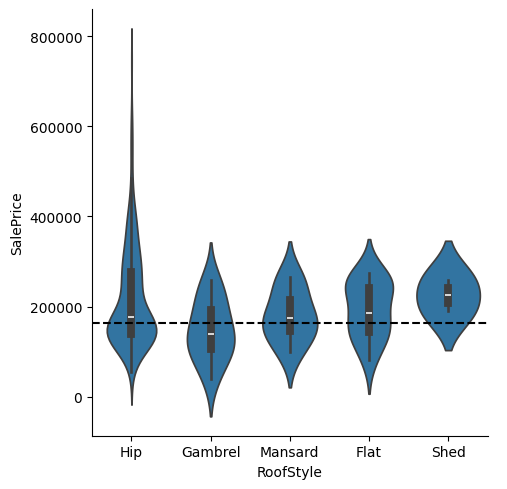

In [66]:
mask = df["RoofStyle"] != "Gable"
tmp = pd.DataFrame(data=df.loc[mask, targ])
tmp["RoofStyle"] = df.loc[mask, "RoofStyle"]
g = sns.catplot(tmp, x="RoofStyle", y=targ, kind="violin")
g.ax.axhline(df[targ].median(), color="k", ls="--")

## RoofMatl

Roof material

Drop

In [67]:
df["RoofMatl"].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

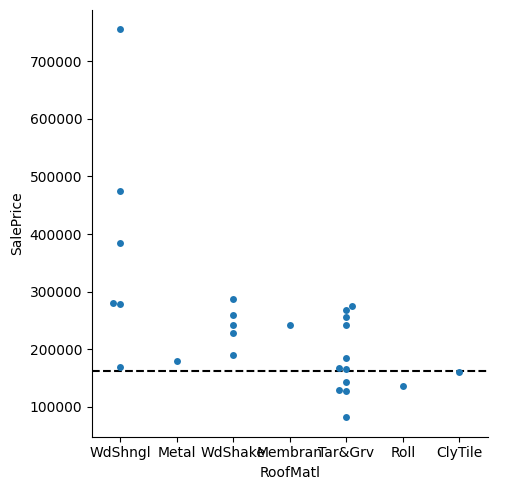

In [68]:
mask = df["RoofMatl"] != "CompShg"
tmp = pd.DataFrame(data=df.loc[mask, targ])
tmp["RoofMatl"] = df.loc[mask, "RoofMatl"]
g = sns.catplot(tmp, x="RoofMatl", y=targ, kind="swarm")
g.ax.axhline(df[targ].median(), color="k", ls="--")

## Exterior1st: Exterior covering on house

OHE with `min_frequency`

In [69]:
vc = df["Exterior1st"].value_counts()
vc

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [70]:
rare = [name for name, count in vc.items() if count < 50]
rare

['WdShing',
 'Stucco',
 'AsbShng',
 'BrkComm',
 'Stone',
 'AsphShn',
 'ImStucc',
 'CBlock']

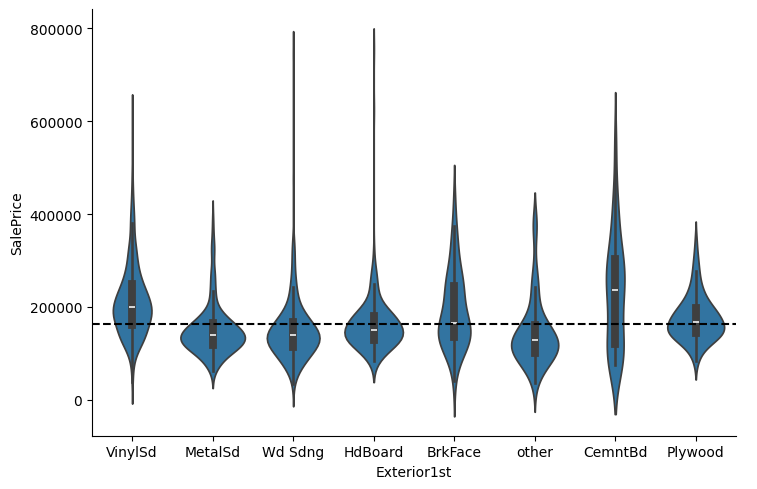

In [71]:
tmp = df.loc[:, ["Exterior1st", targ]].copy()
mask = df["Exterior1st"].isin(rare)
tmp.loc[mask, "Exterior1st"] = "other"
g = sns.catplot(tmp, x="Exterior1st", y=targ, kind="violin", aspect=1.5)
g.ax.axhline(df[targ].median(), color="k", ls="--")

In [72]:
plt.close("all")

## Exterior2nd

Exterior covering on house (if more than one material)

Mostly same vallue as `Exterior1st`, drop for now

In [73]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [74]:
(df["Exterior1st"] == df["Exterior2nd"]).sum()

1245

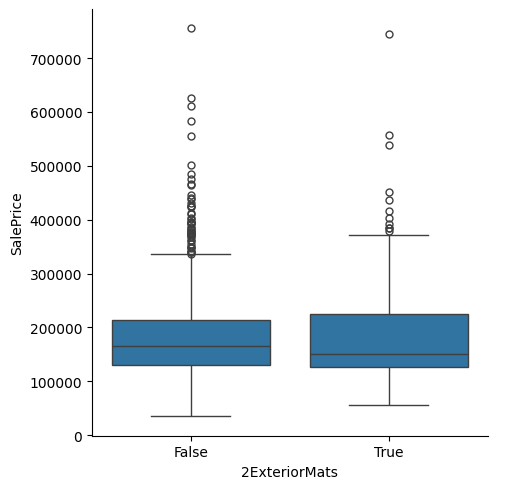

In [75]:
tmp = pd.DataFrame(data=df[targ])
tmp["2ExteriorMats"] = (df["Exterior1st"] != df["Exterior2nd"])
sns.catplot(tmp, x="2ExteriorMats", y=targ, kind="box")

## MasVnrType

Masonry veneer type

Use `Stone` and `BrkFace` as boolean features

In [76]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [77]:
df["MasVnrType"].isna().sum()

872

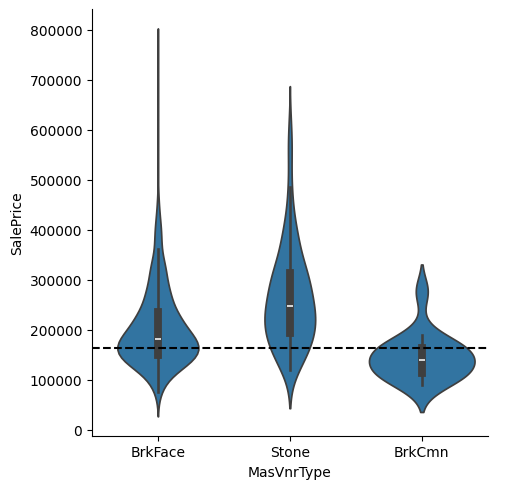

In [78]:
plt.close("all")
g = sns.catplot(df, x="MasVnrType", y=targ, kind="violin")
g.ax.axhline(df[targ].median(), color="k", ls="--")

## MasVnrArea: Masonry veneer area in square feet

Floats, but most values are 0.

Use nonzero mask as a boolean feature.

In [79]:
df["MasVnrArea"].dtype

dtype('float64')

In [80]:
df["MasVnrArea"].isna().sum()

8

<Axes: xlabel='MasVnrArea', ylabel='Count'>

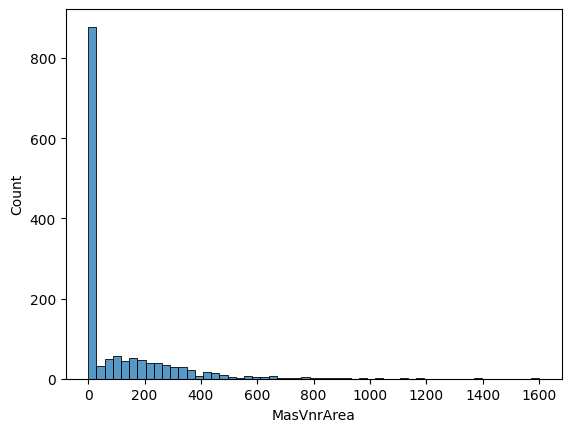

In [81]:
plt.close("all")
sns.histplot(df, x="MasVnrArea")

In [82]:
(df["MasVnrArea"] > 0).sum()

591

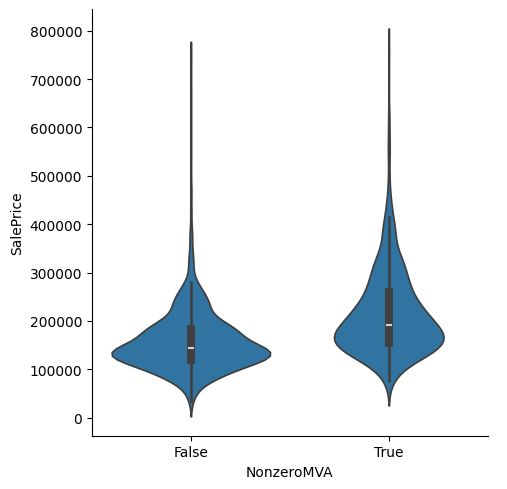

In [83]:
tmp = pd.DataFrame(data=df[targ])
tmp["NonzeroMVA"] = df["MasVnrArea"] > 0
plt.close("all")
sns.catplot(tmp, x="NonzeroMVA", y=targ, kind="violin")

## ExterQual

Exterior material quality

Don't know what exactly to do with these quality metrics

In [84]:
df["ExterQual"].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [85]:
df["ExterCond"].isna().any()

False

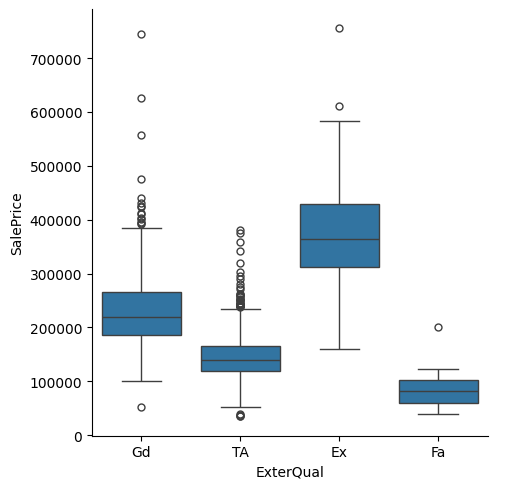

In [86]:
plt.close("all")
sns.catplot(df, x="ExterQual", y=targ, kind="box")

## ExterCond: Present condition of the material on the exterior

In [87]:
df["ExterCond"].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [88]:
df["ExterCond"].isna().any()

False

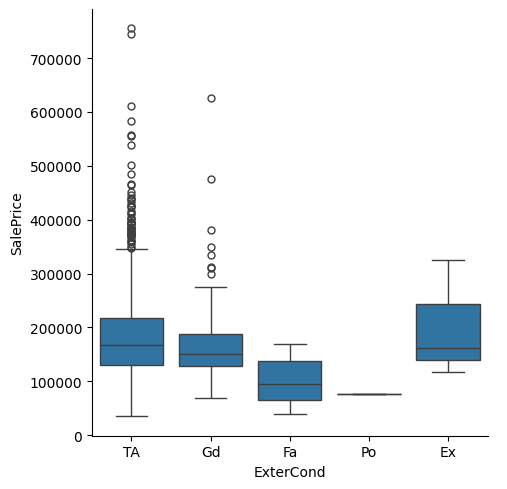

In [89]:
plt.close("all")
sns.catplot(df, x="ExterCond", y=targ, kind="box")

## Foundation

Type of foundation

OHE with `min_frequency`

In [90]:
df["Foundation"].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [91]:
df["Foundation"].isna().any()

False

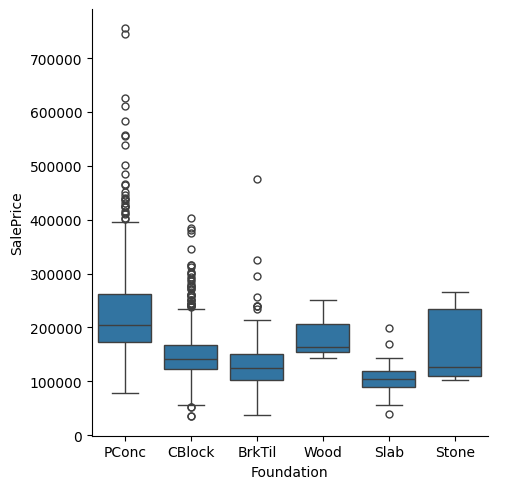

In [92]:
sns.catplot(df, x="Foundation", y=targ, kind="box")

## BsmtQual: Height of the basement

In [93]:
df["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [94]:
df["BsmtQual"].isna().sum()

37

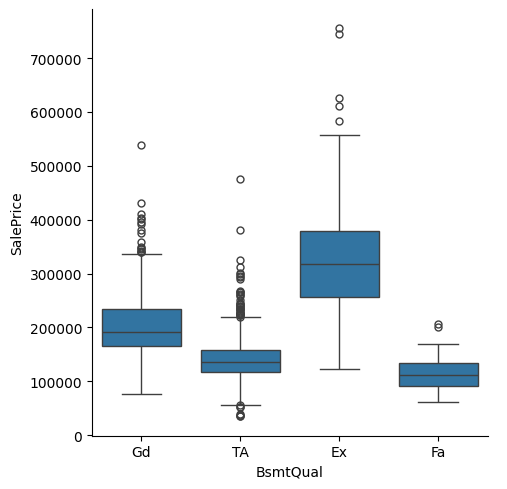

In [95]:
sns.catplot(df, x="BsmtQual", y=targ, kind="box")

## BsmtCond: General condition of the basement

In [96]:
df["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [97]:
df["BsmtCond"].isna().sum()

37

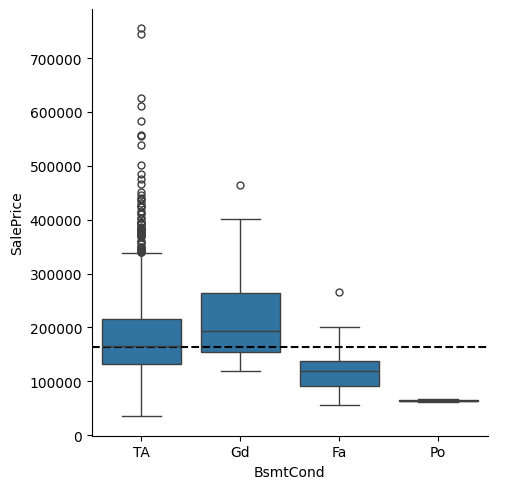

In [98]:
plt.close("all")
g = sns.catplot(df, x="BsmtCond", y=targ, kind="box")
g.ax.axhline(df[targ].median(), color="k", ls="--")

## BsmtExposure: Walkout or garden level basement walls

In [99]:
df["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

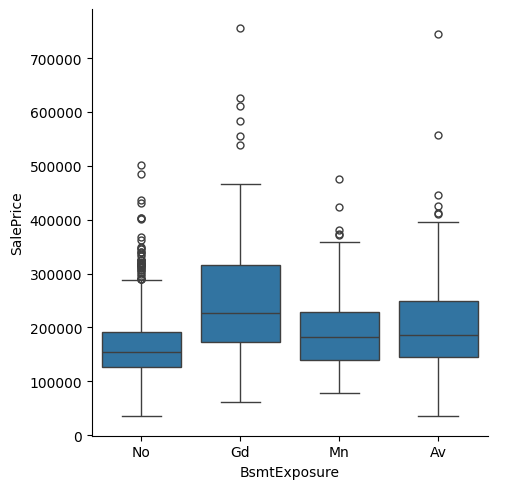

In [100]:
plt.close("all")
sns.catplot(df, x="BsmtExposure", y=targ, kind="box")

## TotalBsmtSF

Total square feet of basement area

Use logarithmic feature for some reason

In [101]:
df["TotalBsmtSF"].dtype

dtype('int64')

In [102]:
df["TotalBsmtSF"].isna().sum()

0

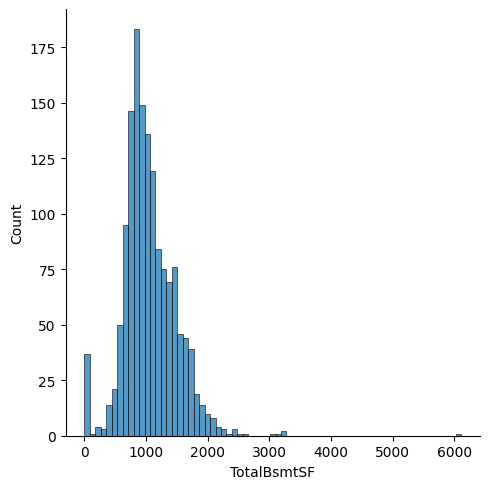

In [103]:
plt.close("all")
sns.displot(df, x="TotalBsmtSF")

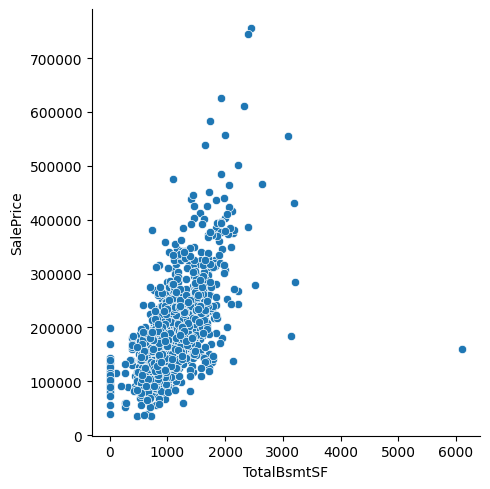

In [104]:
sns.relplot(df, x="TotalBsmtSF", y=targ, kind="scatter")

In [105]:
(df["TotalBsmtSF"] == 0).sum()

37

## Heating

Type of heating

Few non-default values, drop

In [106]:
df["Heating"].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

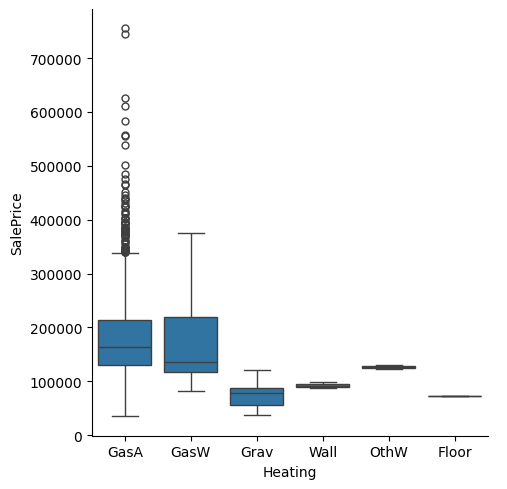

In [107]:
plt.close("all")
sns.catplot(df, x="Heating", y=targ, kind="box")

## HeatingQC: Heating quality and condition

In [108]:
df["HeatingQC"].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

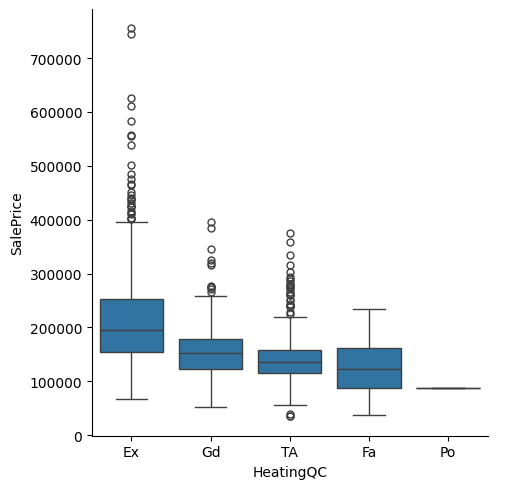

In [109]:
plt.close("all")
sns.catplot(df, x="HeatingQC", y=targ, kind="box")

## CentralAir

Central air conditioning

Use `N` as a boolean feature

In [110]:
df["CentralAir"].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

<Axes: xlabel='CentralAir', ylabel='SalePrice'>

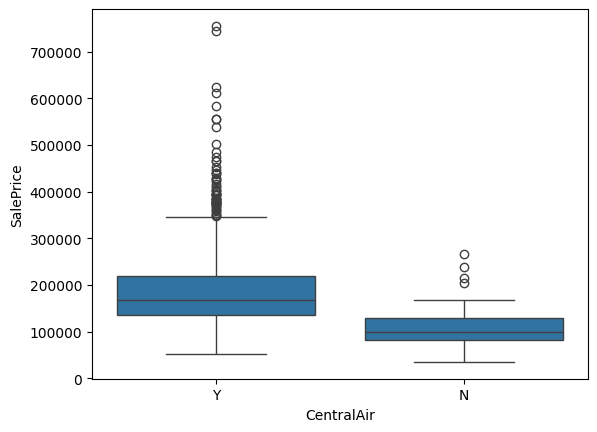

In [111]:
plt.close("all")
sns.boxplot(df, x="CentralAir", y=targ)

## Electrical

Electrical system

Group `Fuse` categories

In [112]:
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

<Axes: xlabel='Electrical', ylabel='SalePrice'>

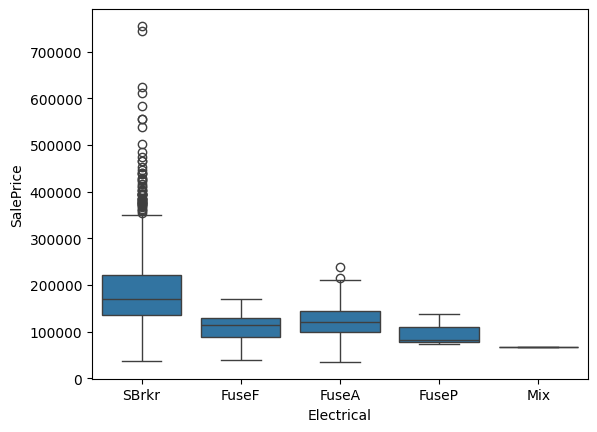

In [113]:
plt.close("all")
sns.boxplot(df, x="Electrical", y=targ)

## LowQualFinSF

Low quality finished square feet (all floors)

Nonzero boolean flag

In [114]:
df["LowQualFinSF"].dtype

dtype('int64')

In [115]:
df["LowQualFinSF"].isna().sum()

0

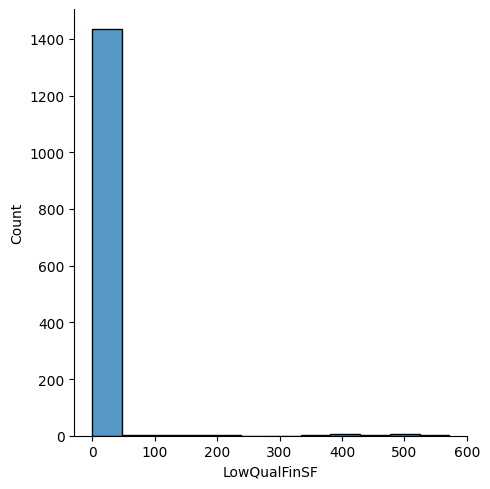

In [116]:
plt.close("all")
sns.displot(df, x="LowQualFinSF")

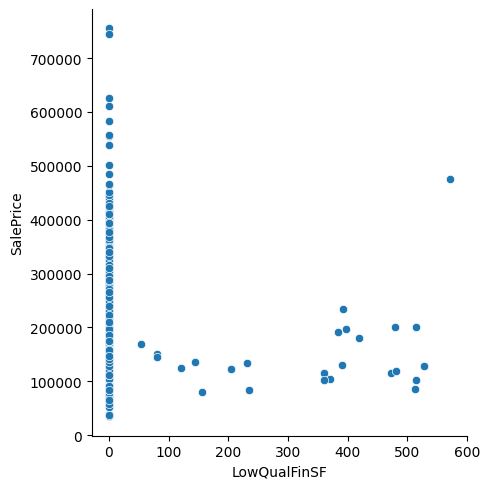

In [117]:
sns.relplot(df, x="LowQualFinSF", y=targ, kind="scatter")

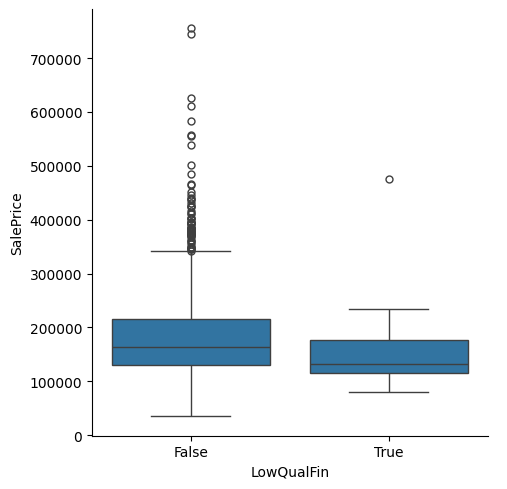

In [118]:
tmp = pd.DataFrame(data=df[targ])
tmp["LowQualFin"] = df["LowQualFinSF"] > 0
plt.close("all")
sns.catplot(tmp, x="LowQualFin", y=targ, kind="box")

## GrLivArea

Above grade (ground) living area square feet

Distribution does not look normal, maybe add a log feature?

In [119]:
df["GrLivArea"].dtype

dtype('int64')

In [120]:
df["GrLivArea"].isna().sum()

0

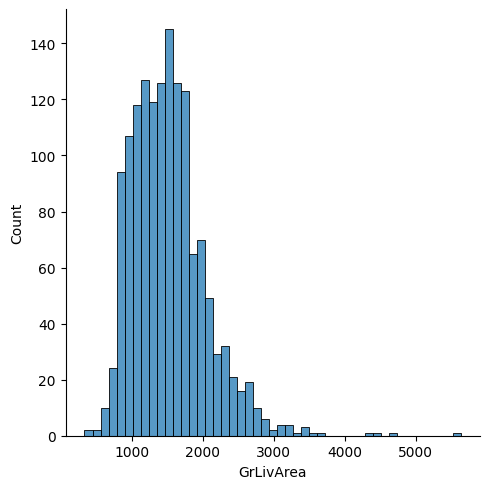

In [121]:
sns.displot(df, x="GrLivArea")

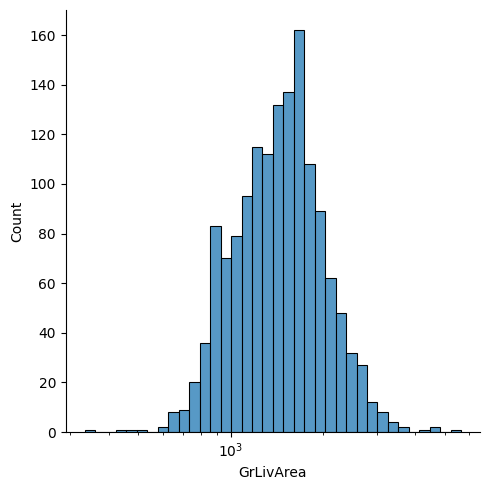

In [122]:
sns.displot(df, x="GrLivArea", log_scale=True)

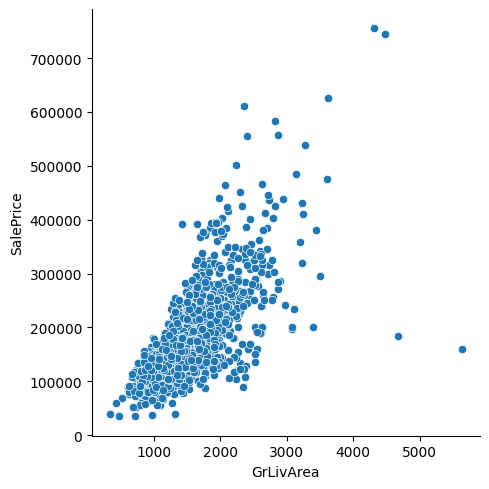

In [123]:
sns.relplot(df, x="GrLivArea", y=targ)

## FullBath

Full bathrooms above grade

Few values, use OHE

In [124]:
df["FullBath"].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [125]:
df["FullBath"].isna().any()

False

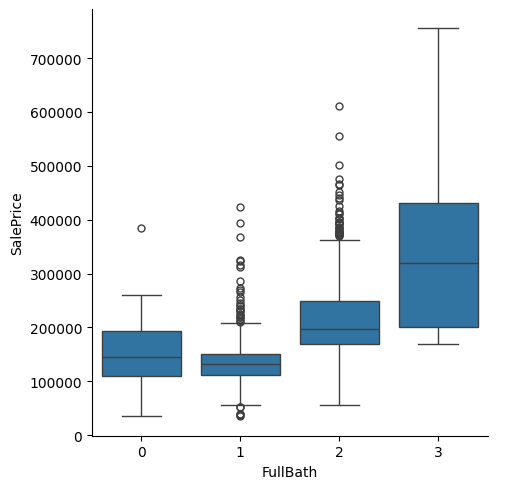

In [126]:
sns.catplot(df, x="FullBath", y=targ, kind="box")

## HalfBath

Half baths above grade

Also OHE

In [127]:
df["HalfBath"].value_counts()

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

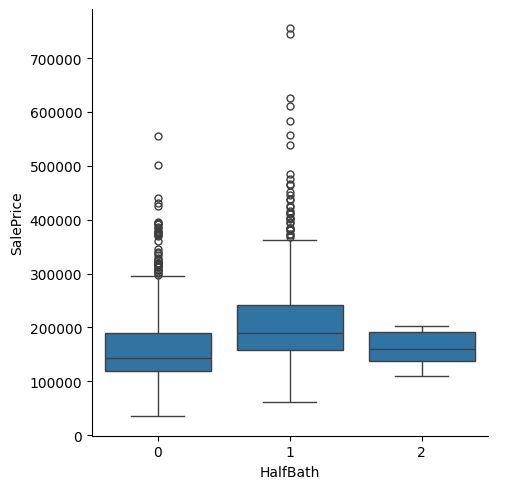

In [128]:
sns.catplot(df, x="HalfBath", y=targ, kind="box")

## BedroomAbvGr

Number of bedrooms above basement level

Add 3+ bedrooms as a boolean feature.

In [129]:
df["BedroomAbvGr"].value_counts()

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

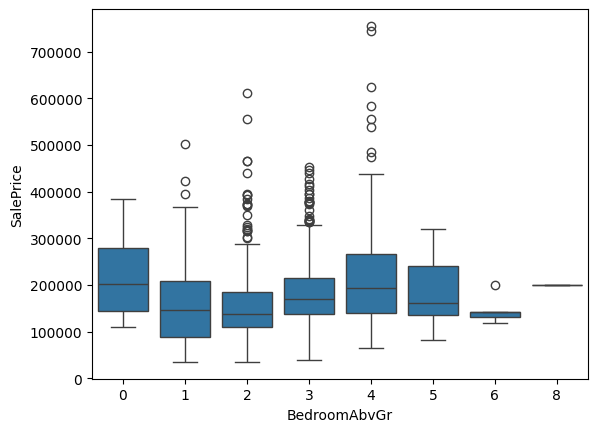

In [130]:
sns.boxplot(df, x="BedroomAbvGr", y=targ)

## KitchenAbvGr

Number of kitchens

Add 2+ as a boolean feature

In [131]:
df["KitchenAbvGr"].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

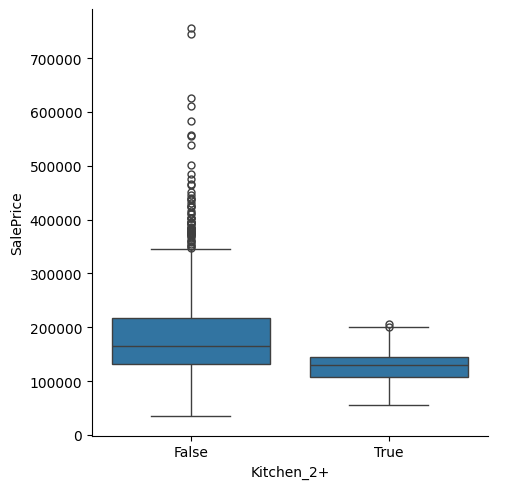

In [132]:
tmp = pd.DataFrame(df[targ])
tmp["Kitchen_2+"] = df["KitchenAbvGr"] > 1
plt.close("all")
sns.catplot(tmp, x="Kitchen_2+", y=targ, kind="box")

## KitchenQual: Kitchen quality

In [133]:
df["KitchenQual"].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [134]:
df["KitchenQual"].isna().any()

False

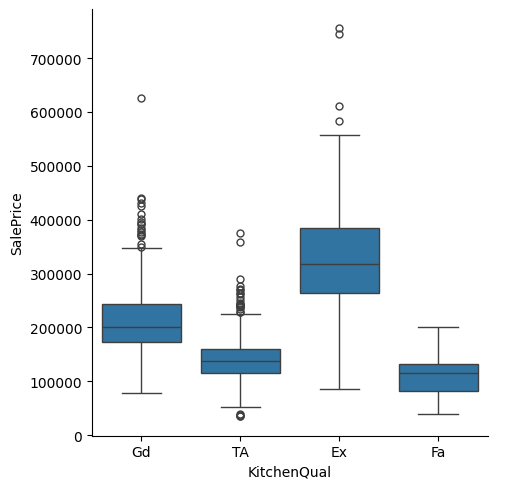

In [135]:
plt.close("all")
sns.catplot(df, x="KitchenQual", y=targ, kind="box")

## TotRmsAbvGrd

Total rooms above grade (does not include bathrooms)

Probably use bins with OHE

In [136]:
df["TotRmsAbvGrd"].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

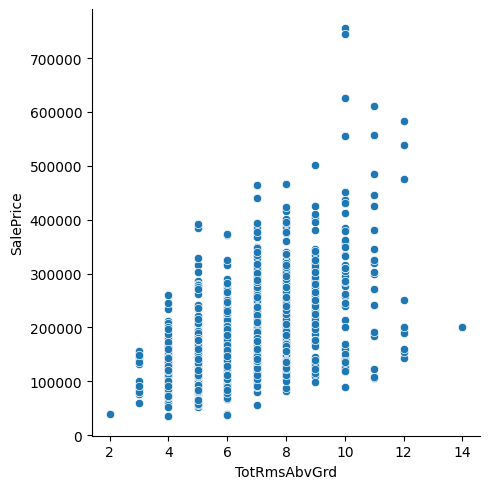

In [137]:
plt.close("all")
sns.relplot(df, x="TotRmsAbvGrd", y=targ, kind="scatter")

## Functional

Home functionality rating

Encode all non-`Typ` values as a boolean feature

In [138]:
df["Functional"].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [139]:
df["Functional"].isna().any()

False

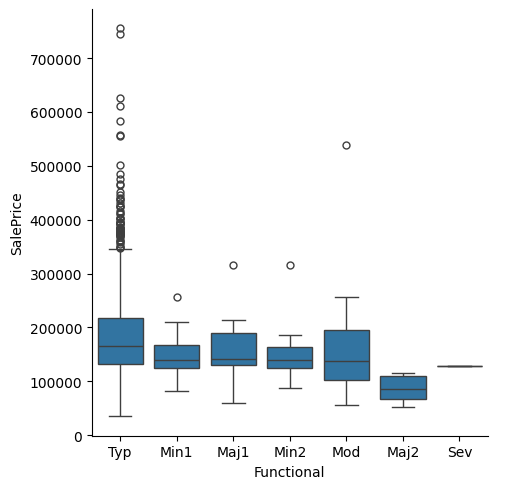

In [140]:
sns.catplot(df, x="Functional", y=targ, kind="box")

## GarageType

Garage location

Use `Detchd` and `BuiltIn` as boolean features.

In [141]:
df["GarageType"].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [142]:
df["GarageType"].isna().sum()

81

In [143]:
mask = df["GarageType"].isna()
df.loc[mask, targ].median()

100000.0

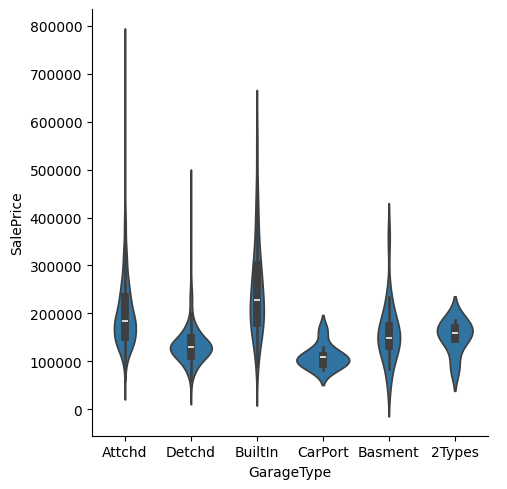

In [144]:
plt.close("all")
sns.catplot(df, x="GarageType", y=targ, kind="violin")

## GarageCars

Size of garage in car capacity

Manual bins: `[0, 1, 2, 3+]`

In [145]:
df["GarageCars"].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

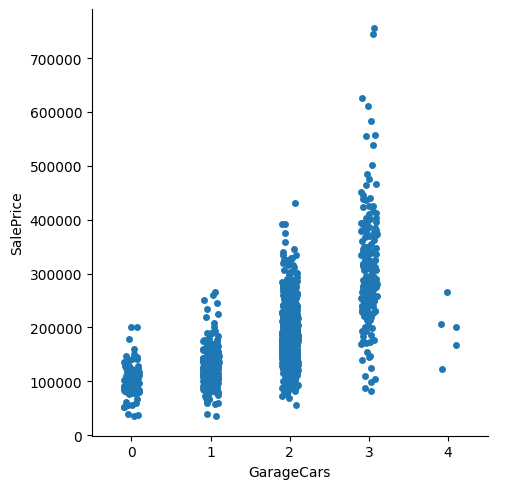

In [146]:
plt.close("all")
sns.catplot(df, x="GarageCars", y=targ, kind="strip")

## PoolArea

Pool area in square feet

Only 7 pools, drop

In [147]:
df["PoolArea"].dtype

dtype('int64')

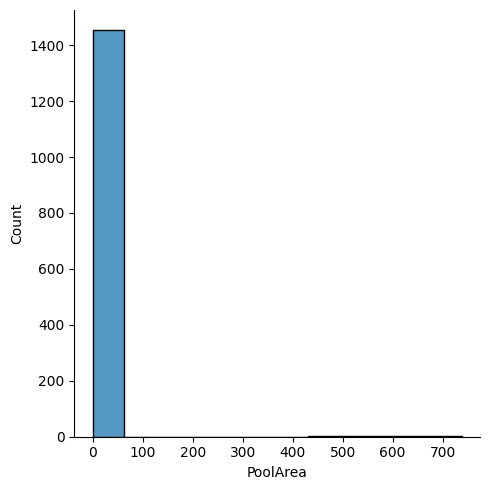

In [148]:
sns.displot(df, x="PoolArea", kind="hist")

In [149]:
mask = df["PoolArea"] > 0
mask.sum()

7

## YrSold

Year Sold (duh)

Weirdly consistent despite the whole financial crisis thing.

Use alongside `YearBuilt` for `Age` feature.

In [150]:
df["YrSold"].dtype

dtype('int64')

In [151]:
df["YrSold"].isna().any()

False

In [152]:
df["YrSold"].value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

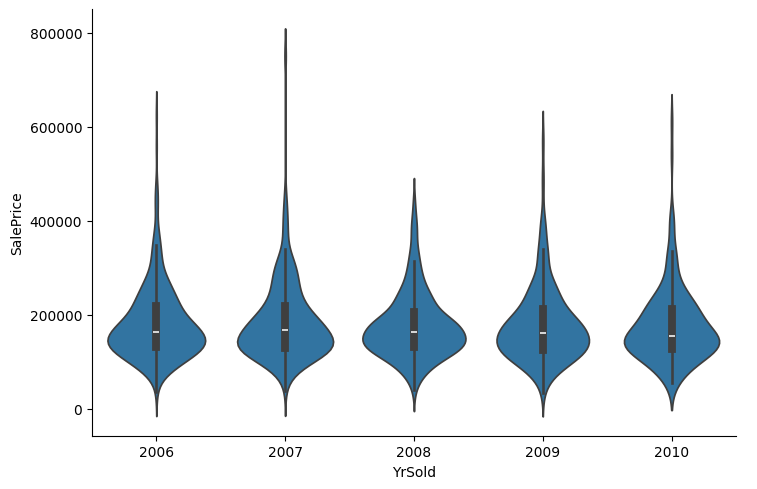

In [153]:
plt.close("all")
sns.catplot(df, x="YrSold", y=targ, aspect=1.5, kind="violin")

## MoSold

Month Sold

Not that much seasonality, maybe should combine with year?

Drop for now

In [154]:
df["MoSold"].value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [155]:
df["MoSold"].isna().any()

False

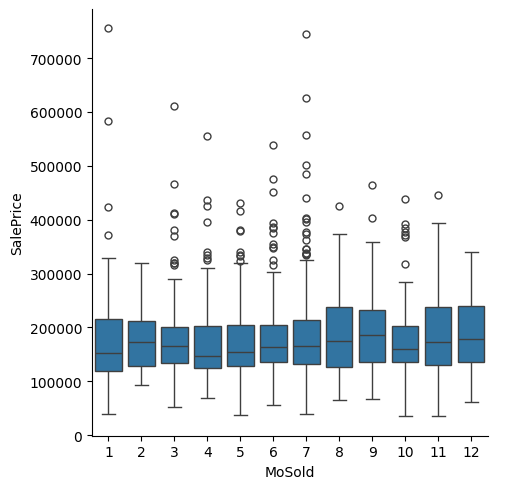

In [156]:
plt.close("all")
sns.catplot(df, x="MoSold", y=targ, kind="box")

<Axes: xlabel='MoSold', ylabel='Count'>

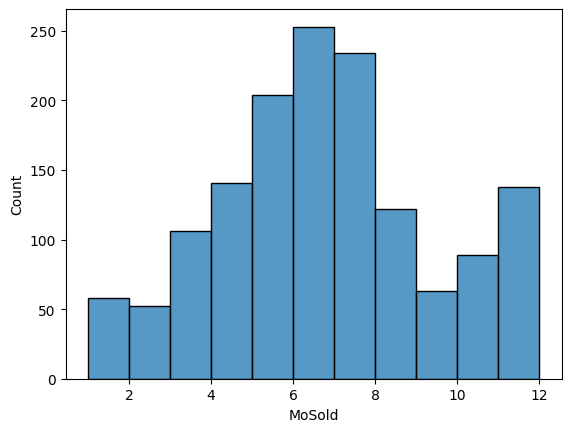

In [157]:
sns.histplot(df, x="MoSold", bins=range(1, 13))

## SaleType

Type of sale

Only use `New` as a boolean feature.

In [158]:
df["SaleType"].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [159]:
df["SaleType"].isna().any()

False

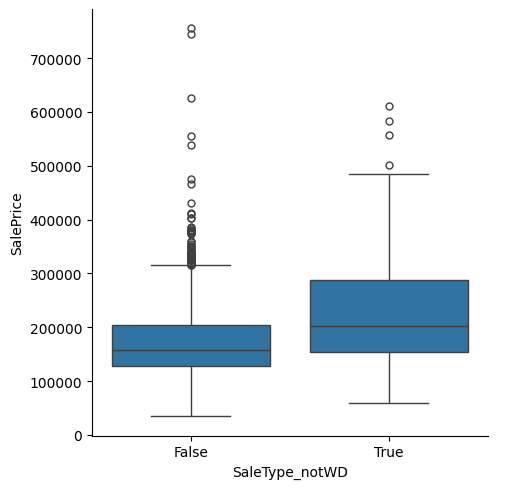

In [160]:
tmp = pd.DataFrame(data=df[targ])
tmp["SaleType_notWD"] = ~(df["SaleType"].str.endswith("WD"))
plt.close("all")
sns.catplot(tmp, x="SaleType_notWD", y=targ, kind="box")

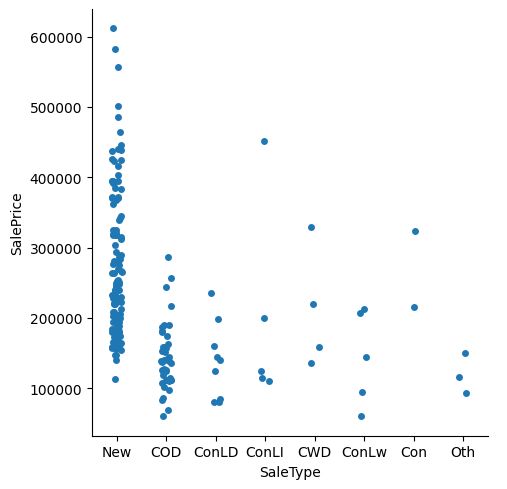

In [161]:
mask = df["SaleType"] != "WD"
tmp = df.loc[mask, ["SaleType", targ]]
sns.catplot(tmp, x="SaleType", y=targ, kind="strip")

* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* SaleCondition: Condition of sale